In [ ]:
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb
sudo apt-get install -f

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,954 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,441 kB]
Get:14 http://arc

In [ ]:
!pip install chromedriver-py
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00


In [ ]:
import sys
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from tqdm.notebook import tqdm
import pandas as pd
import json
import pprint
from chromedriver_py import binary_path
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
chrome_options = webdriver.ChromeOptions()  # Initialize Chrome options
chrome_options.add_argument('--headless')  # Run Chrome in headless mode - In our local notebook we can remove the `--headless` option.
chrome_options.add_argument('--no-sandbox')  # Disable Chrome’s default sandboxing behavior
chrome_options.add_argument('--disable-dev-shm-usage')  # Overcome limited resource problems
chrome_options.add_argument("window-size=1900,800")  # Set the window size for the browser
chrome_options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36")  # Set a custom user agent

In [ ]:
service = Service(executable_path=binary_path)  # Create a Service object with the path to the ChromeDriver executable
wd = webdriver.Chrome(service=service, options=chrome_options)  # Initialize the WebDriver with the specified service and options

In [ ]:
wd.get('https://www.ilfattoquotidiano.it/?s=siccit%C3%A0&orderby=data&tipo_r=estesa&author_s=&startdate_s=&enddate_s=&canale=&tipo_con=&sa=Cerca&s_type=standard#ifq_search_title')

In [ ]:
def show_page():
    wd.save_screenshot('screenshot.png')

    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    img = mpimg.imread('/content/screenshot.png')
    plt.figure(figsize=(20, 10))
    imgplot = plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

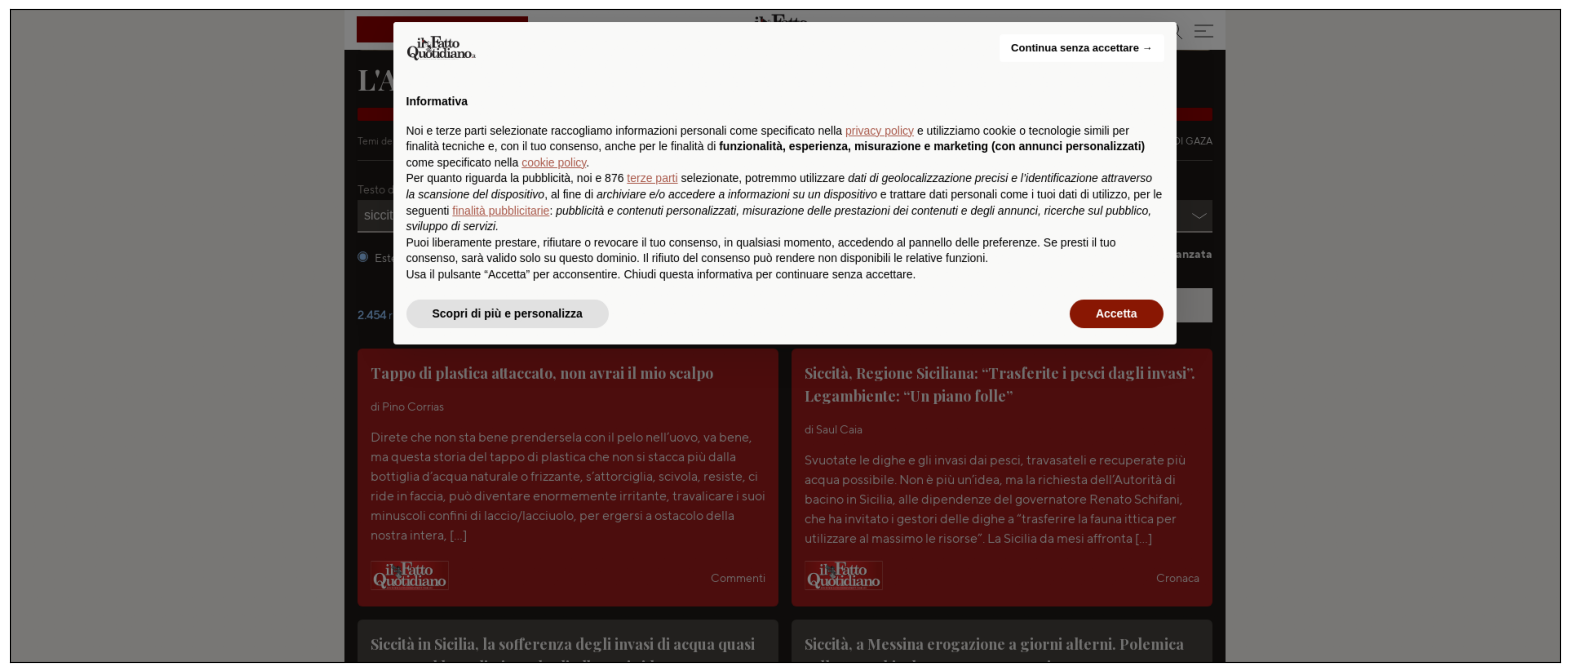

In [ ]:
show_page()

In [ ]:
try:
  wd.find_elements(By.CSS_SELECTOR, '.iubenda-cs-accept-btn')[0].click()
except:
  print('Cookie già accettati')

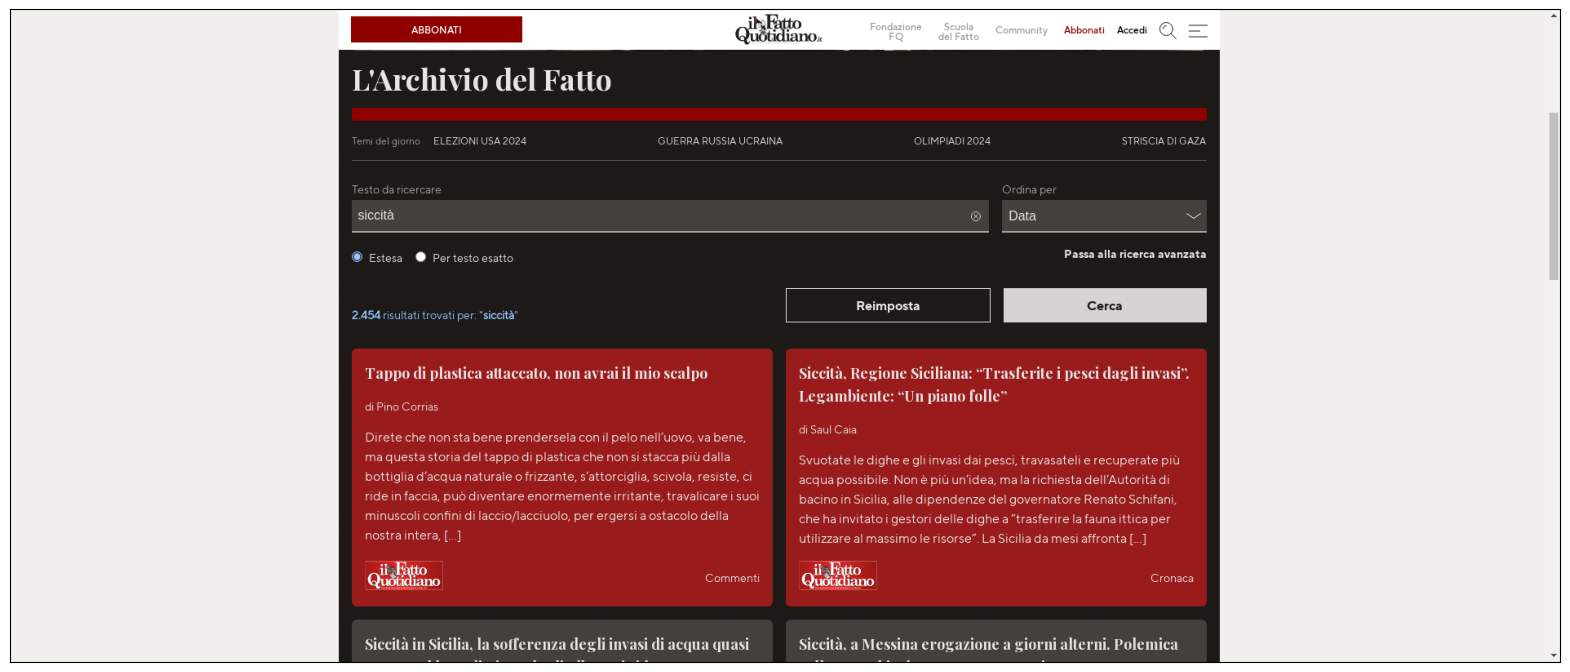

In [ ]:
show_page()

In [ ]:
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

page = 1
seen_articles = []
seen_articles_url = []
seen_theme = []
seen_date = []
seen_text_articles = []
seen_grassetto = []

while True:
    try:
        # Carica la pagina dei risultati di ricerca
        wd.get(f"https://www.ilfattoquotidiano.it/?paged={page}&s=siccit%C3%A0&orderby=data&tipo_r=estesa&author_s&startdate_s&enddate_s&canale&tipo_con&sa=Cerca&s_type=standard")

        # Attende che gli elementi della pagina siano caricati
        WebDriverWait(wd, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, ".ifq-search-result__title"))
        )

        # Aggiorna il BeautifulSoup con il nuovo HTML della pagina
        full_html = wd.page_source
        soup = BeautifulSoup(full_html, 'html.parser')

        elements1 = soup.find_all(class_="ifq-search-result__detail ifq-search-result__detail--center")
        elements2 = soup.find_all(class_="ifq-search-result__detail ifq-search-result__detail--right")
        themes = [element.get_text(strip=True) for element in elements1]
        dates = [element.get_text(strip=True) for element in elements2]

        # Trova gli articoli nella pagina
        list_articles = soup.find_all(class_="ifq-search-result__title")

        # Se non trova articoli nella pagina, interrompe il ciclo
        if not list_articles:
            print("Non ho trovato nulla.")
            break

        # Processa gli articoli trovati
        new_article_found = False
        for i, article in enumerate(list_articles):
            try:
                article_title = article.text
                url = article.find("a")["href"]

                # Vai all'URL dell'articolo
                wd.get(url)

                # Attende che gli elementi della pagina siano caricati
                WebDriverWait(wd, 10).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, ".article-content"))
                )

                # Estrai il testo dell'articolo
                article_content = wd.find_element(By.CSS_SELECTOR, ".article-content").text

                # Estrai le parole in grassetto
                article_html = wd.page_source
                article_soup = BeautifulSoup(article_html, 'html.parser')
                bold_elements = article_soup.find_all("strong")
                bold_words = [element.get_text(strip=True) for element in bold_elements]

                # Verifica che ci siano abbastanza dati per questo articolo
                theme = themes[i] if i < len(themes) else "Tema non trovato"
                date = dates[i] if i < len(dates) else "Data non trovata"

                # Verifica se l'articolo è già stato visto
                if article_title not in seen_articles:
                    print(article_title)
                    print(url)
                    print(theme)
                    print(date)
                    print(article_content)
                    print("Parole in grassetto:", bold_words)
                    print()
                    seen_articles.append(article_title)
                    seen_articles_url.append(url)
                    seen_theme.append(theme)
                    seen_date.append(date)
                    seen_text_articles.append(article_content)
                    seen_grassetto.append(bold_words)
                    new_article_found = True

                # Torna alla pagina dei risultati di ricerca
                wd.back()

            except Exception as e:
                print(f"Error processing article: {e}")

        if not new_article_found:
            print(f"No new articles found on page {page}. Exiting loop.")
            break

        # Incrementa il numero di pagina per analizzare la pagina successiva
        page += 1

        # Pausa tra le richieste per evitare di sovraccaricare il server
        time.sleep(5)

    except Exception as e:
        print(f"Error during page load or processing: {e}")
        break

    # Ferma lo scraping dopo la terza pagina
    #if page > 3:
     #   print("Raggiunta la pagina 3. Interrompe lo scraping.")
      #  break


ModuleNotFoundError: No module named 'selenium'

In [ ]:
import pandas as pd

In [ ]:
ids = [f"Art_{str(i+1).zfill(4)}" for i in range(len(seen_articles))]

# Crea il dizionario con i dati
data = {
    "ID": ids,
    "Title": seen_articles,
    "URL": seen_articles_url,
    "Theme": seen_theme,
    "Date": seen_date,
    "Text": seen_text_articles
}

df_Il_Fatto_Quotidiano = pd.DataFrame(data)

In [ ]:
data_2 = {
    "ID": ids,
    "Title": seen_articles,
    "Bold Words": seen_grassetto
}

# Crea il DataFrame
df_grassetto = pd.DataFrame(data_2)

In [ ]:
#export file --> test
!pip install pandas openpyxl

with pd.ExcelWriter('articoli_parole_chiave.xlsx', engine='openpyxl') as file_path:
    df_Il_Fatto_Quotidiano.to_excel(file_path, sheet_name='Articoli', index=False)
    df_grassetto.to_excel(file_path, sheet_name='Parole_Chiave', index=False)

from google.colab import files
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>